<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/YB_4_5_%E1%84%89%E1%85%A6%E1%84%89%E1%85%A7%E1%86%AB_%E1%84%86%E1%85%AE%E1%86%AB%E1%84%8C%E1%85%A6_%E1%84%91%E1%85%A7%E1%86%BC%E1%84%80%E1%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [3]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y, y_pred):
  accuracy = accuracy_score(y, y_pred)
  precision = precision_score(y,y_pred)
  recall=recall_score(y,y_pred)


In [18]:
accuracy = accuracy_score(y, y_pred)
accuracy

0.9121265377855887

* 정밀도

In [16]:
precision= precision_score(y, y_pred)
precision

0.900990099009901

* 재현율

In [19]:
recall=recall_score(y,y_pred)
recall

0.8584905660377359

* F1 score

In [26]:
from sklearn.metrics import f1_score

f1 = f1_score(y, y_pred)
f1

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [33]:
from sklearn.preprocessing import Binarizer
y_pred2 = Binarizer(threshold=0.1)
y_pred_proba = model_lor.predict_proba(X)
y_pred2 = binarizer.fit_transform(y_pred_proba[:, 0].reshape(-1, 1))
print(y_pred2)

[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.

In [37]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
confusion_matrix(y,y_pred2)

array([[  1, 356],
       [139,  73]])

In [38]:
accuracy_score(y,y_pred2)


0.13005272407732865

In [39]:

precision_score(y,y_pred2)

0.17016317016317017

In [40]:

recall_score(y,y_pred2)

0.3443396226415094

In [36]:
f1_score(y,y_pred2)

0.2277691107644306

* ROC 곡선 시각화

In [45]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y,y_pred_proba[:,1])

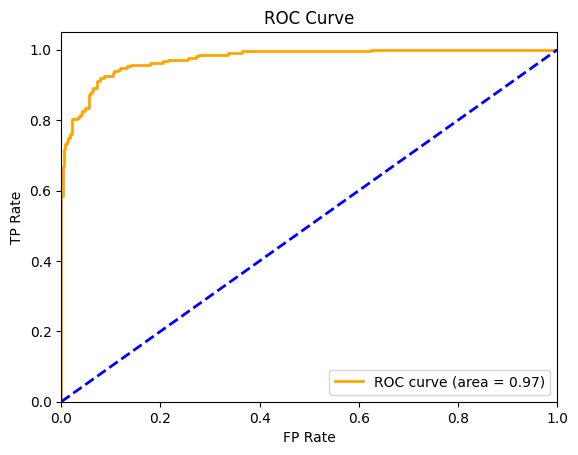

In [48]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

* ROC AUC 값

In [50]:
roc_auc = auc(fpr,tpr)
roc_auc

0.9741424871835527